<a href="https://colab.research.google.com/github/HoganHBG/ML-for-business-with-Python/blob/master/HW_Hogan_telco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#My Homework


In [ ]:
#Check Columns and data types
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5070 non-null   object 
 1   gender            5070 non-null   object 
 2   SeniorCitizen     5070 non-null   int64  
 3   Partner           5070 non-null   object 
 4   Dependents        5070 non-null   object 
 5   tenure            5070 non-null   int64  
 6   PhoneService      5070 non-null   object 
 7   MultipleLines     5070 non-null   object 
 8   InternetService   5070 non-null   object 
 9   OnlineSecurity    5070 non-null   object 
 10  OnlineBackup      5070 non-null   object 
 11  DeviceProtection  5070 non-null   object 
 12  TechSupport       5070 non-null   object 
 13  StreamingTV       5070 non-null   object 
 14  StreamingMovies   5070 non-null   object 
 15  Contract          5070 non-null   object 
 16  PaperlessBilling  5070 non-null   object 


In [ ]:
numerical_cols = telco_data.columns[telco_data.dtypes=='int64'].tolist()
numerical_cols

['SeniorCitizen', 'tenure']

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check label counts.
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

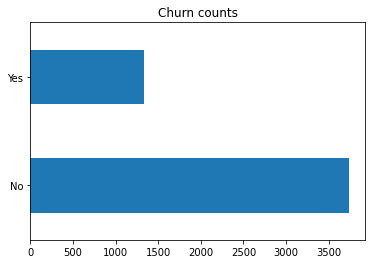

In [ ]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 


In [ ]:
# Look at tenure data for any patterns
telco_data['tenure'].describe()

count    5070.000000
mean       32.230178
std        24.619080
min         0.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
# Replacing 'Yes' and 'No' with numerical values
telco_data.Churn = telco_data.Churn.replace({'Yes':1, 'No':0}) 

In [ ]:
telco_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5060,6133-OZILE,Female,0,No,No,18,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,35.20,607.3,0
5061,4135-FRWKJ,Female,1,Yes,Yes,55,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Electronic check,76.25,4154.55,0
5062,2911-UREFD,Female,0,Yes,No,39,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,55.90,2184.35,1
5063,3744-ZRRDZ,Male,0,No,No,21,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.35,1852.85,1
5064,5673-TIYIB,Male,0,No,No,2,No,No phone service,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),40.40,77.15,1
5065,6551-ZCOTS,Male,1,No,No,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.90,847.8,0
5066,7191-ADRGF,Male,0,Yes,No,44,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),54.30,2390.45,0
5067,5018-LXQQG,Female,0,Yes,Yes,30,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),66.30,1923.5,0
5068,6892-BOGQE,Female,0,Yes,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.90,1493.2,0
5069,1602-IJQQE,Female,0,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.35,338.1,1


In [ ]:
categorical_cols = telco_data.columns[telco_data.dtypes=='object'].tolist()
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [ ]:
multi_valued_colmmns = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() > 2].index.tolist()
multi_valued_colmmns

['customerID',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalCharges']

In [ ]:
binary_colmmns = telco_data[categorical_cols].nunique()[telco_data[categorical_cols].nunique() == 2].index.tolist()
binary_colmmns

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [ ]:
# Transform binary_columns
for column in binary_colmmns :
  telco_data[column] = LabelEncoder().fit_transform(telco_data[column])

In [ ]:
#removing customer ID as ID's don't contribute much to analysis

telco_data = telco_data.iloc[:,1:]

In [ ]:
# Converting Total Charges to a numerical data type.
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [ ]:
#as there are only 8 record that are not null in our dataframe out of 5070 records, we can drop the same
#Removing missing values 
telco_data.dropna(inplace = True)

In [ ]:
telco_data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
#as data has lot of categorical variables, Let's convert all the categorical variables into dummy variables
telco_data_final = pd.get_dummies(telco_data)
telco_data_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled,columns=numerical_cols)
scaled

,SeniorCitizen,tenure
0,-0.436372,-1.268661
1,-0.436372,0.071895
2,-0.436372,-1.228038
3,-0.436372,0.518747
4,-0.436372,-1.228038
...,...,...
5065,2.291624,0.031272
5066,-0.436372,0.478124
5067,-0.436372,-0.090596
5068,-0.436372,1.574943


In [ ]:
telco_data.MonthlyCharges.value_counts()

20.05     36
19.85     35
19.90     33
19.70     32
19.55     31
          ..
96.90      1
77.75      1
73.95      1
112.55     1
96.15      1
Name: MonthlyCharges, Length: 1439, dtype: int64

In [ ]:
telco_data_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


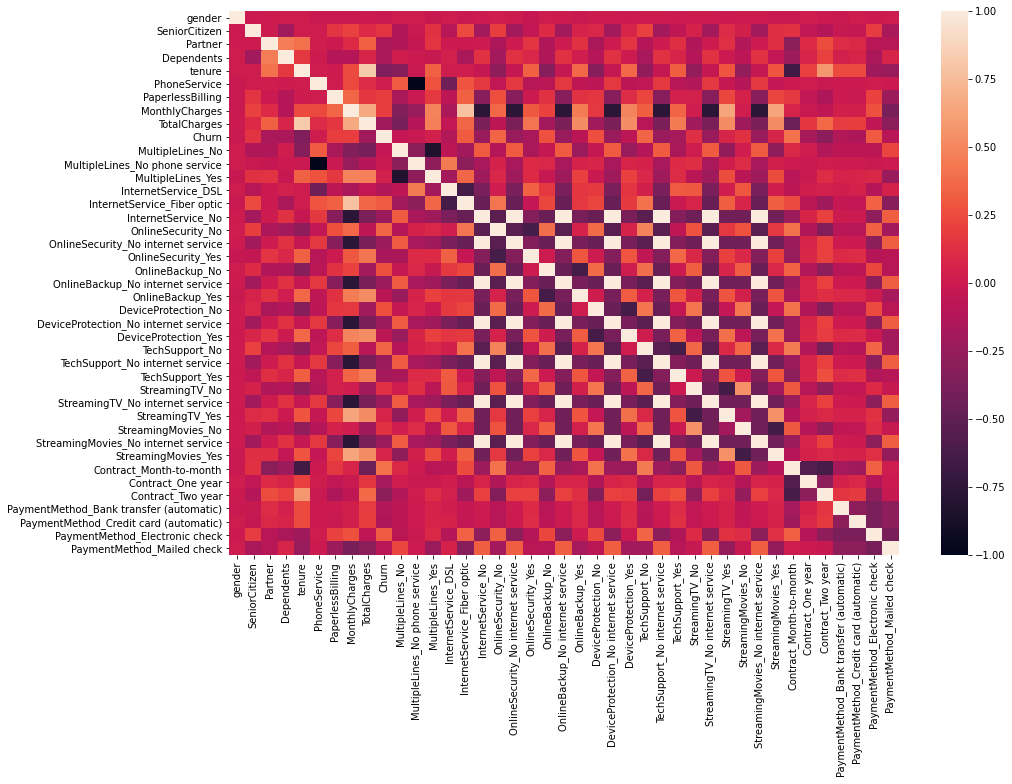

In [ ]:
# Look at correlation matrix. 
corr_matrix = telco_data_final.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
y = telco_data_final.pop('Churn') # Removing Churn field and storing it in variable y
X = telco_data_final[['Contract_Month-to-month', 'TechSupport_No','OnlineSecurity_No','PaymentMethod_Electronic check', 'tenure', 'MonthlyCharges', 'PaperlessBilling']] #smaller data set

Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,Contract_Month-to-month,TechSupport_No,OnlineSecurity_No,PaymentMethod_Electronic check,tenure,OnlineBackup_Yes
3231,1,0,0,0,15,1
4515,1,1,1,0,15,1
1538,1,1,1,1,8,1
2771,1,1,0,0,13,0
4528,1,1,1,0,44,1


Fitting model


In [ ]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

Evaluating Model

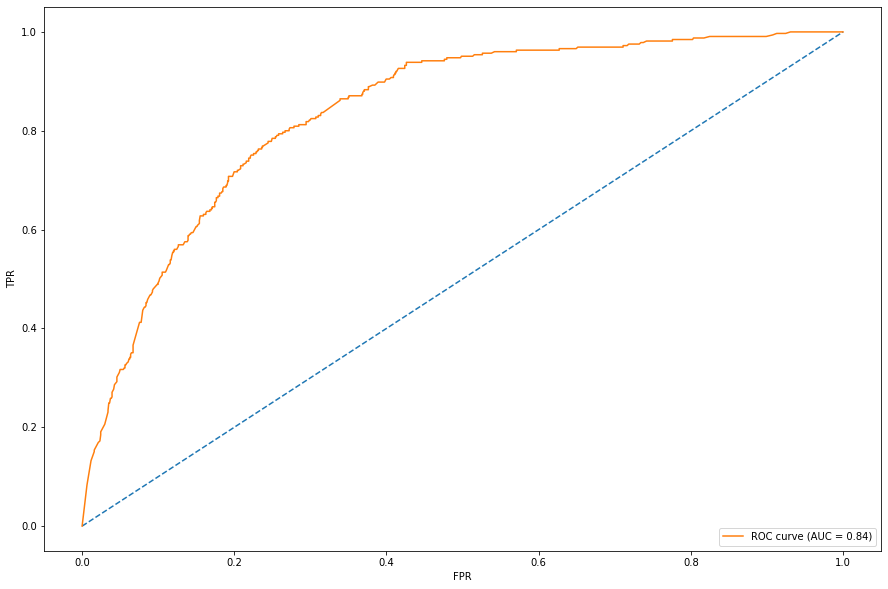

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

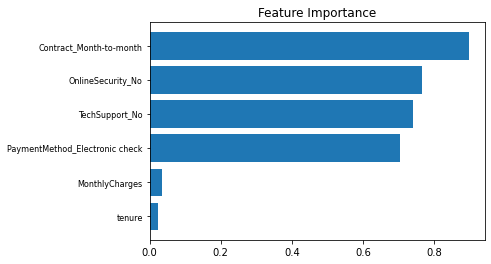

In [ ]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()